In [1]:
pip install jedi==0.17.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import turicreate

In [3]:
sales = turicreate.SFrame('home_data.sframe/')

 #### to make a scatter plot, use:
## turicreate.visualization.scatter(x, y, xlabel='__TURI_DEFAULT_LABEL', ylabel='__TURI_DEFAULT_LABEL', title='__TURI_DEFAULT_LABEL')
(https://apple.github.io/turicreate/docs/api/generated/turicreate.visualization.scatter.html)

In [5]:
sales.show

<bound method SFrame.show of Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000.0 |   3.0    |    2.25   |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000.0 |   2.0    |    1.0    |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000.0 |   4.0    |    3.0    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000.0 |   3.0    |    2.0  

In [9]:
turicreate.visualization.scatter(sales[1:5000]['sqft_living'],sales[1:5000]['price'],xlabel='living size',ylabel='price',title='one parameter regression')

In [10]:
turicreate.plot(sales[1:5000]['sqft_living'],sales[1:5000]['price'],xlabel='living size',ylabel='price',title='one parameter regression')

Materializing X axis SArray

Materializing Y axis SArray

### note these two codes above render the same

In [11]:
training_set,test_set = sales.random_split(0.8, seed = 0)

In [15]:
dturicreate.linear_regression.create(training_set,target = 'price',features=['sqft_living']) #can create a colum

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.008194     | 4330551.769301     | 2037501.632318       | 264151.280178                   | 239023.973279                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

## now evaluate how this model works

In [14]:
print(test_set['price'].mean()) 

543054.0425632538


In [16]:
sqft_model.evaluate(test_set)

{'max_error': 4128468.338072728, 'rmse': 255223.30271403055}

##### rmse is root means squared error, like average error. max error is just, max error. this is badly predicted
## check the prediction

In [24]:
pip install matplotlib 

     |████████████████████████████████| 8.5 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 533 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib.pyplot as plt #another plotting tool, the inline code just makes the plot stays in notebook itself
%matplotlib inline 

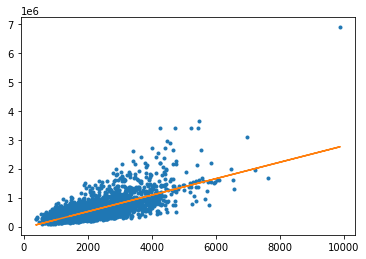

In [31]:
plt.plot(test_set['sqft_living'],test_set['price'],'.',test_set['sqft_living'],sqft_model.predict(test_set),'-')


# the '.' and '-' just means the shape of the plot

In [33]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-49831.70157055382,5070.459390846464
sqft_living,None,283.75767072778825,2.2301023655616796


## add more parameters

In [34]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [38]:
sales[my_features].show()

Materializing SFrame

it just shows the frequency above

In [45]:
turicreate.show(sales[1:200]['zipcode'],sales[1:200]['price'])

Materializing X axis SArray

Materializing Y axis SArray

## revise the regression model

In [49]:
my_features_model = turicreate.regression.create(training_set, target = 'price', features = my_features )

Automatically generating validation set from 5% of the data.

Linear regression:

--------------------------------------------------------

Number of examples          : 16452

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.030180     | 4103914.075905     | 3786499.827669       | 186466.139441                   | 233155.419839                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 16452

Number of features          : 6

Number of unpacked features : 6

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 0.011634     | 6520119.500000     | 5882619.500000       | 484346.375000                   | 528476.312500                     |

| 2         | 0.020008     | 5389327.000000     | 4751827.000000       | 373575.062500                   | 417267.312500                     |

| 3         | 0.027212     | 4492650.000000     | 3855150.000000       | 302268.906250                   | 340583.593750                     |

| 4         | 0.035757     | 3853033.000000     | 3215533.000000       | 257714.781250                   | 303016.281250                     |

| 5         | 0.043755     | 3307201.500000     | 2669701.500000       | 230272.468750                   | 273039.906250                     |

| 10        | 0.073857     | 2168994.750000     | 3212961.000000       | 184028.687500                   | 247101.375000                     |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

In [52]:
print(sqft_model.evaluate(test_set))
print(my_features_model.evaluate(test_set))

{'max_error': 4128468.338072728, 'rmse': 255223.30271403055}
{'max_error': 3145541.7535949484, 'rmse': 180044.34621341265}


## apply to predict

In [57]:
house1 = sales[sales['id']== '5309101200'] ##can use this to select any values

In [58]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img soure = ''>  to insert a pic

In [69]:
print(house1['price'])

[620000.0, ... ]


In [70]:
print(sqft_model.predict(house1))

[631186.708176138]


In [71]:
print(my_features_model.predict(house1))

[727481.8475477634]


In [77]:
house2 = sales[sales['id']=='1925069082']

In [73]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [78]:
sqft_model.predict(house2)

dtype: float
Rows: 1
[1266803.8906063838]

In [79]:
my_features_model.predict(house2)

dtype: float
Rows: 1
[1229363.6918037923]

In [80]:
house2['price']

dtype: float
Rows: 1
[2200000.0]

# customize the inputs

In [81]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

in order to plug in, we need to express bill_gates as a 'matrx':turicreate.SFrame(bill_gates)

In [83]:
my_features_model.predict(turicreate.SFrame(bill_gates))

dtype: float
Rows: 1
[14903475.481101474]

In [84]:
sqft_model.predict(turicreate.SFrame(bill_gates))

dtype: float
Rows: 1
[14138051.834818859]